In [80]:
import pandas as pd
import numpy as np

In [81]:
df = pd.read_csv(r"C:\Users\dlsat\Downloads\archive (9)\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [82]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [83]:
df = df.drop(columns=["Surname",])
df.dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [84]:
df["Geography"] = df["Geography"].astype('category')
df["Geography"] = df["Geography"].cat.codes
df["Gender"] = df["Gender"].astype('category')
df["Gender"] = df["Gender"].cat.codes
df

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [85]:
df.isnull().sum()

RowNumber          0
CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

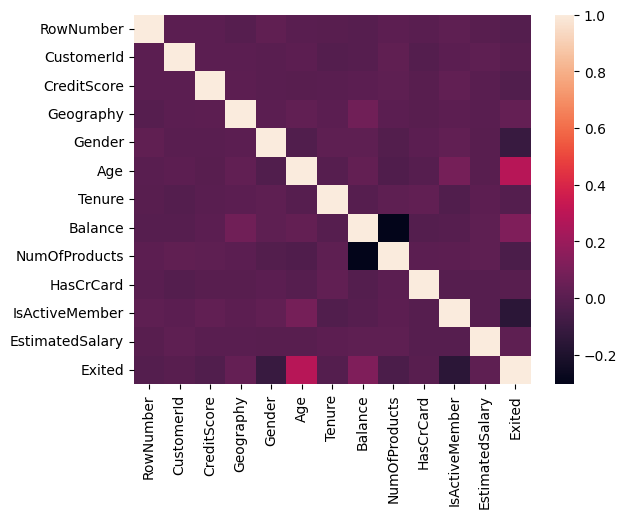

In [86]:
import seaborn as sb
sb.heatmap(df.corr())

C:\Users\dlsat\AppData\Local\Temp\ipykernel_9040\1789674510.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Exited',data = df,palette='hls')


<Axes: xlabel='Exited', ylabel='count'>

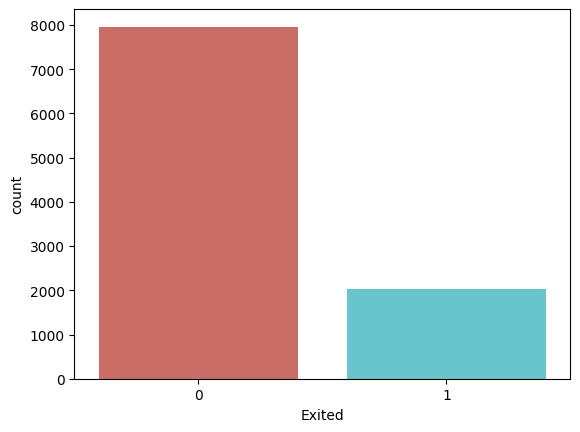

In [87]:
sb.countplot(x='Exited',data = df,palette='hls')

In [88]:
y = df["Exited"].values
x = df.drop(columns=['Exited']).values
x,y

(array([[1.0000000e+00, 1.5634602e+07, 6.1900000e+02, ..., 1.0000000e+00,
         1.0000000e+00, 1.0134888e+05],
        [2.0000000e+00, 1.5647311e+07, 6.0800000e+02, ..., 0.0000000e+00,
         1.0000000e+00, 1.1254258e+05],
        [3.0000000e+00, 1.5619304e+07, 5.0200000e+02, ..., 1.0000000e+00,
         0.0000000e+00, 1.1393157e+05],
        ...,
        [9.9980000e+03, 1.5584532e+07, 7.0900000e+02, ..., 0.0000000e+00,
         1.0000000e+00, 4.2085580e+04],
        [9.9990000e+03, 1.5682355e+07, 7.7200000e+02, ..., 1.0000000e+00,
         0.0000000e+00, 9.2888520e+04],
        [1.0000000e+04, 1.5628319e+07, 7.9200000e+02, ..., 1.0000000e+00,
         0.0000000e+00, 3.8190780e+04]]),
 array([1, 0, 1, ..., 1, 1, 0], dtype=int64))

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [90]:
from sklearn.linear_model import LogisticRegression
regg = LogisticRegression()
regg.fit(x_train,y_train)

c:\Users\dlsat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
y_pred=regg.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

In [93]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(x_test, y_test)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [94]:
res=accuracy_score(y_test, y_pred)
print("random forest",res)

random forest 0.7975


In [95]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
classifier.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
res=accuracy_score(y_test, y_pred)
print("Gradient Boosting",res)

[[1531   64]
 [ 205  200]]
Gradient Boosting 0.8655
